In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

results_path = Path("../data/modeleval/pred_results_ffnn_v1.csv")

In [2]:
df = pd.read_csv(results_path)
print(f"Total predictions: {len(df)}")
df.head()

Total predictions: 97


,peptide,protein,p_def_epitope,p_uncertain,p_not_epitope,pred_class,pred_index,max_prob
0,EELDQWFKNQTSVAPDLSLDYINVTFLDLQ,MFLILLISLPTAFAVIGDLKCTSDNINDKDTGPPPISTDTVDVTNG...,0.460502,0.311954,0.227544,Def epitope,0,0.460502
1,FKEELDKYFKNHTSPDVDLGDISGINASVV,MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDI...,0.471708,0.323376,0.204916,Def epitope,0,0.471708
2,KPTKRSFIEDLLFNKVTLADAGFMKQYGEC,MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDI...,0.358029,0.361073,0.280897,Uncertain,1,0.361073
3,CDVVIGIINNTVYDPLQPELDSFKEELDKY,MKVLIFALLFSLAKAQEGCGIISRKPQPKMEKVSSSRRGVYYNDDI...,0.321735,0.379469,0.298796,Uncertain,1,0.379469
4,VNYTKAPYVMLNTSIPNLPDFKEELDQWFK,MFLILLISLPTAFAVIGDLKCTSDNINDKDTGPPPISTDTVDVTNG...,0.334581,0.372871,0.292548,Uncertain,1,0.372871


In [6]:
class_counts = df["pred_class"].value_counts().sort_index()
class_frac = class_counts / class_counts.sum()

summary = pd.DataFrame({"counts": class_counts, 
                        "fraction": class_frac})
summary

,counts,fraction
pred_class,,
Def epitope,57,0.587629
Not epitope,20,0.206186
Uncertain,20,0.206186


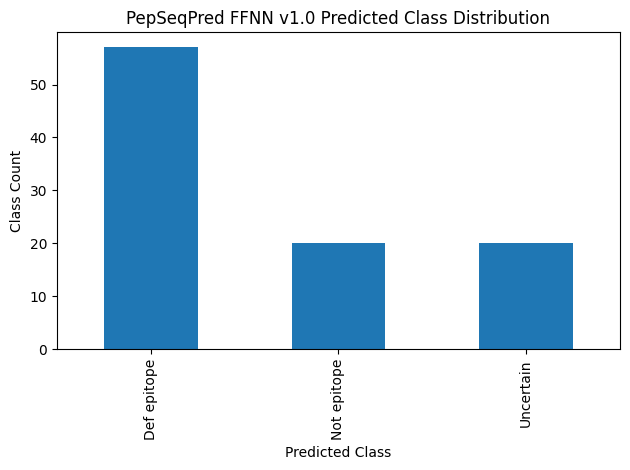

In [8]:
plt.figure()
class_counts.plot(kind="bar")
plt.xlabel("Predicted Class")
plt.ylabel("Class Count")
plt.title("PepSeqPred FFNN v1.0 Predicted Class Distribution")
plt.tight_layout()
plt.show()